In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
quandl.ApiConfig.api_key = 'vRkArkNzwDp2Z8aMgZyX'

try:
    # Fetching data for Google stock as an example
    data = quandl.get('WIKI/GOOGL')
    print(data.head())
    print("Quandl installed and working correctly!")
except Exception as e:
    print(f"An error occurred: {e}")

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [3]:
# The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a price index of a basket of goods and services paid by urban consumers

In [4]:
data= quandl.get('FRED/CPIAUCSL')


In [5]:
data.head(5)


,Value
Date,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


In [6]:
data.shape


(901, 1)

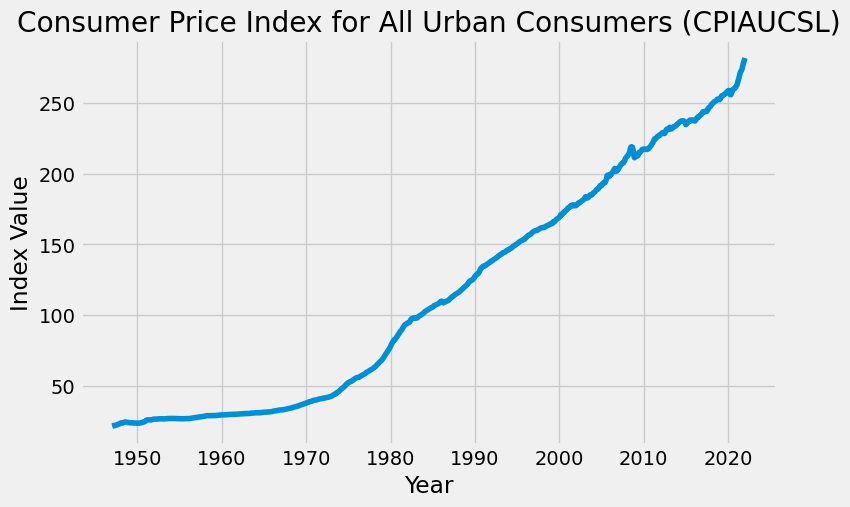

In [7]:

plt.figure(figsize=(8,5), dpi=100) 
plt.title('Consumer Price Index for All Urban Consumers (CPIAUCSL)')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.grid(True)
plt.plot(data)


In [8]:
# Reset index so that you can use the \"Date\" column as a filter

df_CPI = data.reset_index()

In [9]:
df_CPI.head()

,Date,Value
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [10]:
sub_CPI = df_CPI.loc[(df_CPI['Date'] >= '2000-01-01')]

In [11]:
sub_CPI.shape

(265, 2)

In [12]:
sub_CPI.head()


,Date,Value
636,2000-01-01,169.3
637,2000-02-01,170.0
638,2000-03-01,171.0
639,2000-04-01,170.9
640,2000-05-01,171.2


In [13]:
# Set the "Date" column as the index.

from datetime import datetime
sub_CPI['datetime'] = pd.to_datetime(sub_CPI['Date']) # Create a datetime column from \"Date.\"\"\n",
sub_CPI = sub_CPI.set_index('datetime')  # Set the datetime as the index of the dataframe.\n",
sub_CPI.drop(['Date'], axis=1, inplace=True) # Drop the \"Date\" column.\n",
sub_CPI.head()

,Value
datetime,
2000-01-01,169.3
2000-02-01,170.0
2000-03-01,171.0
2000-04-01,170.9
2000-05-01,171.2


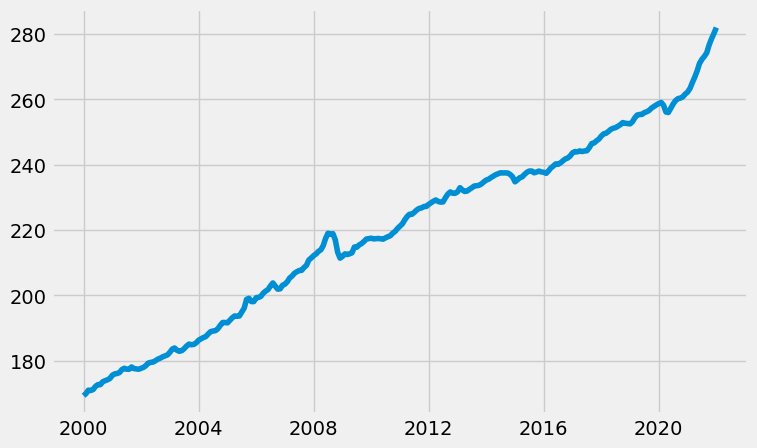

In [14]:
plt.figure(figsize=(8,5) )
    
plt.plot(sub_CPI)

In [15]:
# Check for missing values (you shouldn't have any)

sub_CPI.isnull().sum()

Value    0
dtype: int64

In [16]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub_CPI, model='additive')

In [17]:
from pylab import rcParams # This will define a fixed size for all special charts.\n",

rcParams['figure.figsize'] = 10, 5

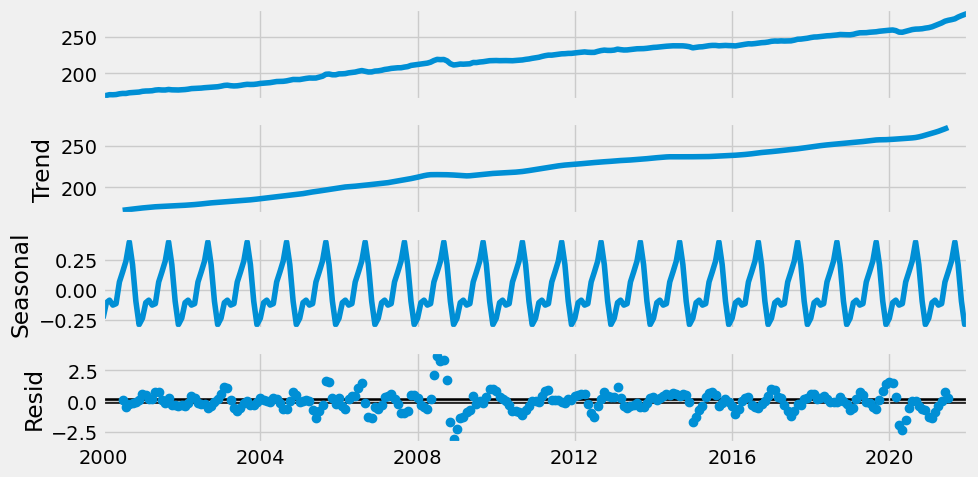

In [18]:
# Plot the separate components

decomposition.plot()
plt.tight_layout()
plt.show()

In [ ]:
# Observation -
# From the graph, the trend is steadily increasing over time, indicating that the overall level of the data is rising. This aligns with inflationary trends where the consumer price index consistently increases.
# The graph shows a clear seasonal pattern with regular peaks and troughs, suggesting that there are predictable variations within each year.
# Residual represents random noise and short-term irregularities that are not captured by the trend and seasonal components. These residuals appear to be relatively small and centered around zero, suggesting the decomposition is effective.

In [19]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return an array of numbers. This is why you need to also define a function that prints the correct output from that array.\n",

from statsmodels.tsa.stattools import adfuller 
    
def dickey_fuller(timeseries): # Define the function,   
    
  # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
     result['Critical Value (%s)'%key] = value
     print (result)
# Apply the test using the function on the time series

dickey_fuller(sub_CPI['Value']) 

Dickey-Fuller Stationarity test:
Test Statistic                   1.345940
p-value                          0.996854
Number of Lags Used              2.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
dtype: float64
Test Statistic                   1.345940
p-value                          0.996854
Number of Lags Used              2.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
dtype: float64
Test Statistic                   1.345940
p-value                          0.996854
Number of Lags Used              2.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


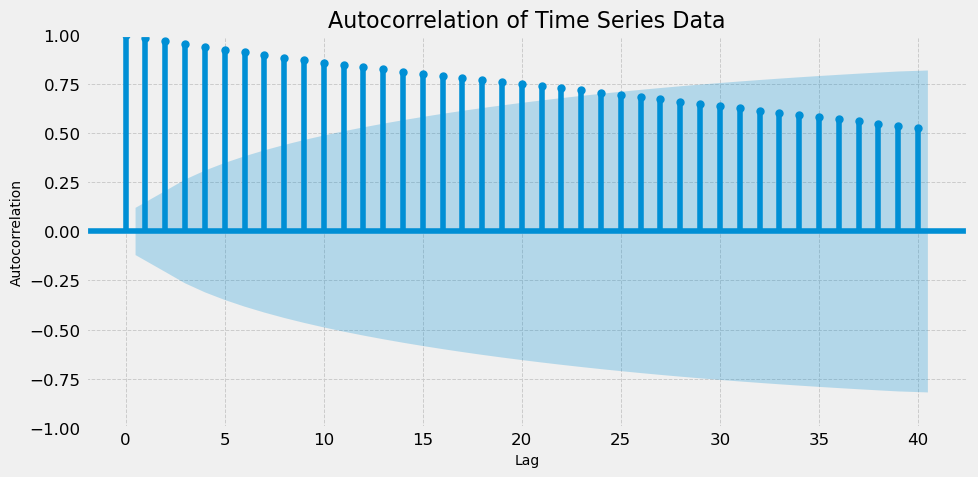

In [20]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots\n",

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(sub_CPI,ax=ax, lags=40)
ax.set_title('Autocorrelation of Time Series Data', fontsize=16)
ax.set_xlabel('Lag', fontsize=10)
ax.set_ylabel('Autocorrelation', fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.tight_layout()
plt.show()

#plot_acf(sub_CPI)
#plt.show()


In [ ]:
# The vertical lines represent the lags in the series, while the blue area represents the confidence interval. 
# When lines go above the blue edge of the confidence interval, this means the lags are significantly correlated with each other. 
# We have many lags beyond this interval, and can deduce that this data is non-stationary.


In [21]:
# Stationarizing the Federal Reserve Economic Data

CPI_diff = sub_CPI - sub_CPI.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)


In [22]:
CPI_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [23]:
CPI_diff.head()


,Value
datetime,
2000-02-01,0.7
2000-03-01,1.0
2000-04-01,-0.1
2000-05-01,0.3
2000-06-01,1.0


In [24]:
CPI_diff.columns


Index(['Value'], dtype='object')

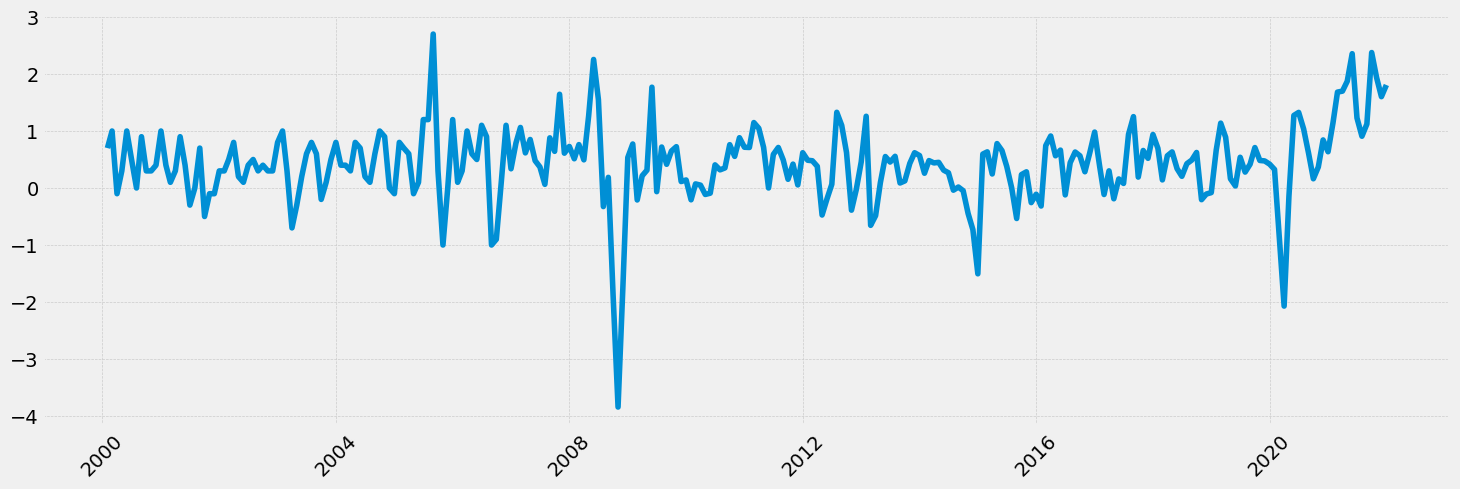

In [25]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.yticks(np.arange(-4, 4, 1))
plt.tight_layout()
plt.plot(CPI_diff)

In [26]:
dickey_fuller(CPI_diff)


Dickey-Fuller Stationarity test:
Test Statistic                -9.570757e+00
p-value                        2.291720e-16
Number of Lags Used            1.000000e+00
Number of Observations Used    2.620000e+02
Critical Value (1%)           -3.455558e+00
dtype: float64
Test Statistic                -9.570757e+00
p-value                        2.291720e-16
Number of Lags Used            1.000000e+00
Number of Observations Used    2.620000e+02
Critical Value (1%)           -3.455558e+00
Critical Value (5%)           -2.872636e+00
dtype: float64
Test Statistic                -9.570757e+00
p-value                        2.291720e-16
Number of Lags Used            1.000000e+00
Number of Observations Used    2.620000e+02
Critical Value (1%)           -3.455558e+00
Critical Value (5%)           -2.872636e+00
Critical Value (10%)          -2.572683e+00
dtype: float64


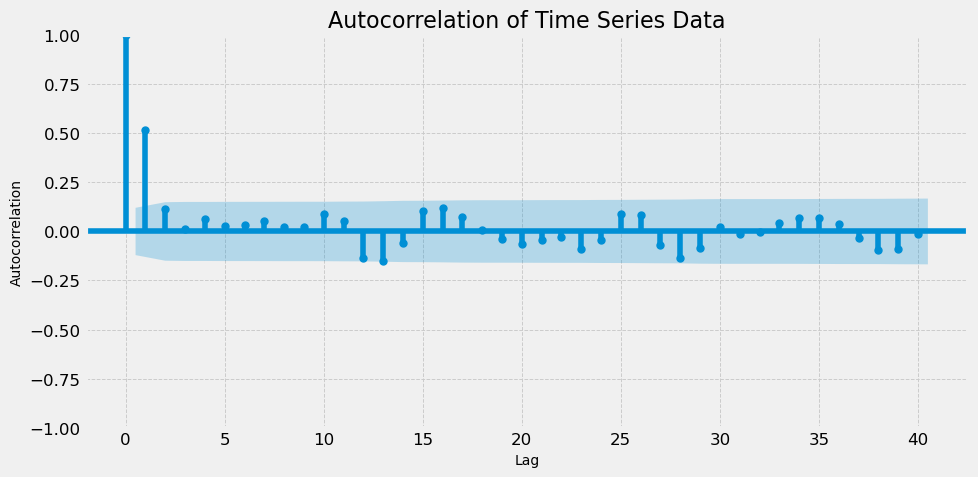

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

plot_acf(CPI_diff,ax=ax, lags=40)
ax.set_title('Autocorrelation of Time Series Data', fontsize=16)
ax.set_xlabel('Lag', fontsize=10)
ax.set_ylabel('Autocorrelation', fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [28]:
# While the autocorrelation plot has improved (there are fewer autocorrelated terms), it’s still not perfect. This means that, despite the Dickey-Fuller test indicating that data is stationary, that stationarity is weak.